In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import scipy

In [2]:
res, sigma, edge = 35, 0, 0.0
shuffle = False
permute = False
new = False
run_ID = f'{res}-{sigma}-{edge}'
run_ID = run_ID + '-shuffled' if shuffle else run_ID
run_ID = run_ID + '-permuted' if permute else run_ID
fname = f'data/rmaps/{run_ID}/speccorr_new.npz' if new else f'data/rmaps/{run_ID}/speccorr.npz'
print(f'Loaded {fname} --- Last modified at {time.ctime(os.stat(fname).st_mtime)}')
speccorr = np.load(fname)

Loaded data/rmaps/35-0-0.0/speccorr.npz --- Last modified at Thu May 23 11:46:01 2024


Written out to images/presentation/heatmaps/35-0-0.0_60.png
Written out to images/presentation/heatmaps/35-0-0.0_90.png


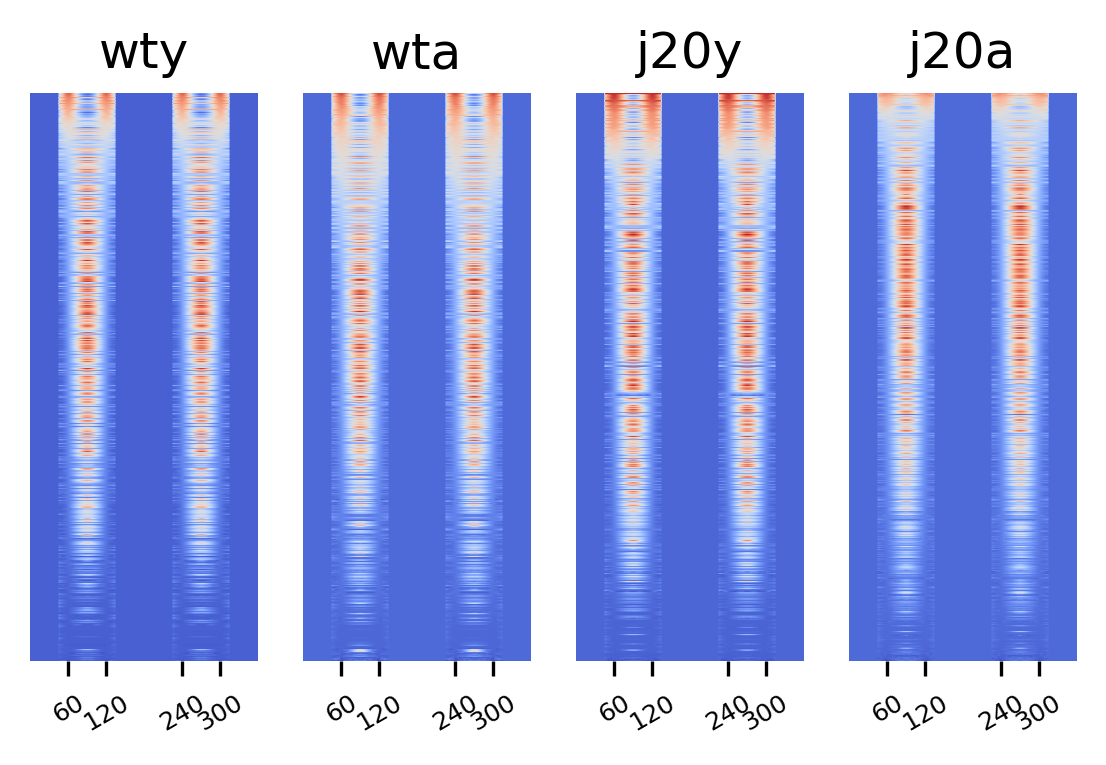

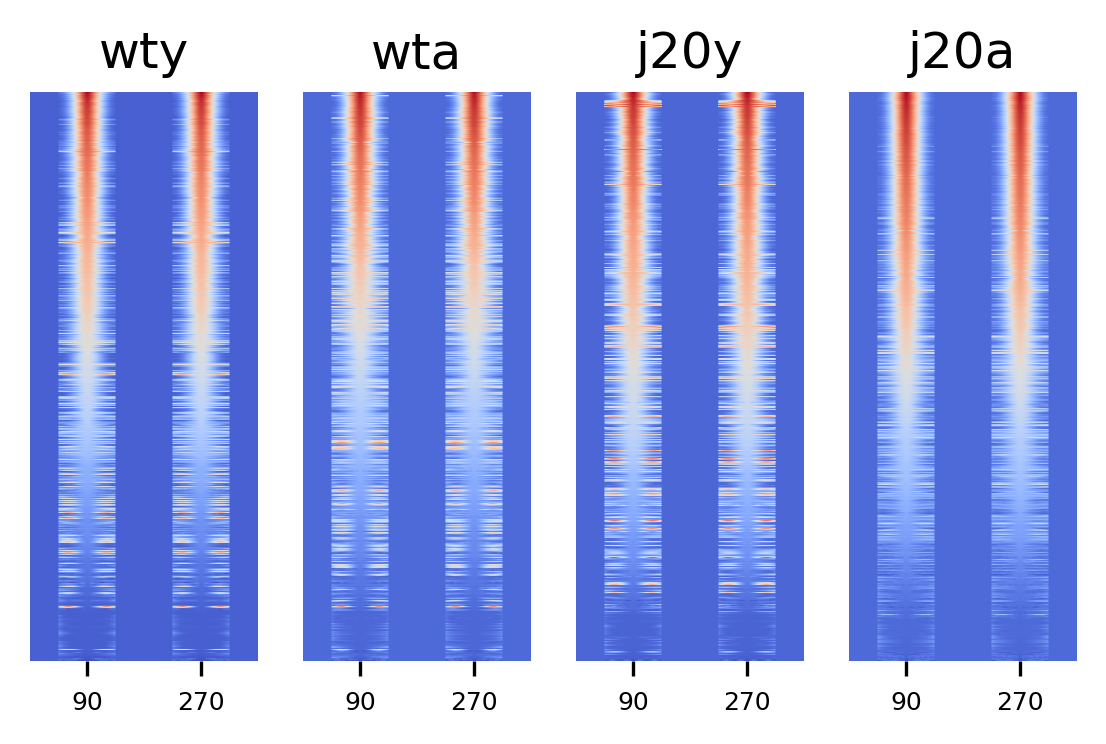

In [3]:
from copy import deepcopy
for angle in [60, 90]:
    fig, axs = plt.subplots(1,4, figsize=(4.5,3), dpi=300)
    for col, (gtype, ax1) in enumerate(zip(['wty','wta','j20y','j20a'],axs)):
        mat = deepcopy(np.nan_to_num(speccorr[gtype]))
        mat[:,:45] = 0
        mat[:,135:225] = 0
        mat[:,315:] = 0
        #mat = np.array([scipy.ndimage.gaussian_filter(line,sigma=5,mode="wrap") for line in mat])
        ncells = len(mat)
        #print(ncells)
        if angle==60:
            cell_order = np.argsort(mat[:,60]+mat[:,120]+mat[:,240]+mat[:,300])[::-1]
        elif angle==90:
            cell_order = np.argsort(mat[:,90]+mat[:,270])[::-1]
        im = ax1.imshow(mat[cell_order],aspect=360/ncells*2.5,cmap='coolwarm') #,vmin=0,vmax=1)
        ax1.set_title(gtype,fontsize=12,color='black')
        ax1.set_yticks([])
        if angle == 60:
            ax1.set_xticks([60,120,240,300])
            ax1.set_xticklabels([60,120,240,300],fontsize=6,rotation=30)
        else:
            ax1.set_xticks([90,270])
            ax1.set_xticklabels([90,270],fontsize=6,rotation=0)
        sns.despine(ax=ax1,left=True,bottom=True)
    figname = f'images/presentation/heatmaps/{run_ID}_{angle}_new.png' if new else f'images/presentation/heatmaps/{run_ID}_{angle}.png'
    fig.savefig(figname)
    print(f'Written out to {figname}')